# Unlocking Insights from Retail Data
Retail businesses generate vast amounts of data daily, and within this data lies the key to understanding customer behavior, optimizing operations, and driving revenue growth. For this exercise, we will explore a dataset containing retail transaction data spanning two time periods: 2009-2010 and 2010-2011.

## This dataset includes information such as:
•⁠ ⁠Invoice Number: A unique identifier for each transaction.

•⁠ ⁠Stock Code: Unique codes for each product sold.

•⁠ ⁠Description: Detailed information about the products.

•⁠ ⁠Quantity: The number of items purchased in each transaction.

•⁠ ⁠Invoice Date: The date and time of the transaction.

•⁠ ⁠Unit Price: Price per unit of each product.

•⁠ ⁠Customer ID: An anonymized identifier for each customer.

•⁠ ⁠Country: The country where the transaction took place.

## Task Instructions for Mentees

Your task is to perform a clustering analysis on this dataset to group customers or transactions into meaningful segments. Considerations:

•⁠ ⁠Use features every possible feature to cluster customers based on purchasing patterns.

•⁠ ⁠Explore clustering algorithms such as K-Means, DBSCAN, or Hierarchical Clustering.

•⁠ ⁠Visualize the clusters and interpret the results to understand customer behavior.

## Submission Guidelines
Submit your findings and insights to info@oaorogun.co.uk. Be sure to include:

•⁠ ⁠For data analysts: A comprehensive report with charts and insights.

•⁠ ⁠For data scientists: A detailed explanation of your clustering methodology, code snippets, and visualizations.

pip install dataprep

In [ ]:
conda install -c conda-forge dataprep

In [3]:
import pandas as pd
import openpyxl
from openpyxl import load_workbook
#from dataprep.eda import create_report
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
import pandas as pd

# Path to your Excel file
file_path = "online_retail_II.xlsx"

# Load the workbook
sheet_names = pd.ExcelFile(file_path).sheet_names  # Get all sheet names

# Load sheets into DataFrames
dfs = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheet_names}

# Access each DataFrame by its sheet name
df1 = dfs.get("Year 2009-2010")  # Replace with actual sheet name
df2 = dfs.get("Year 2010-2011")  # Replace with actual sheet name

# Display the first few rows of each DataFrame
print("DataFrame for Year 2009-2010:")
print(df1.head())

print("\nDataFrame for Year 2010-2011:")
print(df2.head())


DataFrame for Year 2009-2010:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  

DataFrame for Year 2010-2011:
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     7105

In [2]:
print(df1.shape)
df1.head(3)

(525461, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [4]:
# Combine datasets
df = pd.concat([df1, df2])

# Feature engineering
df['Transaction Value'] = df['Quantity'] * df['Price']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [5]:
# Handle missing data (drop or fill)
df = df.dropna(subset=['Quantity', 'Price', 'Customer ID'])

In [6]:

# Normalize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Quantity', 'Transaction Value', 'Price']])


In [7]:

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\abayugo01\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


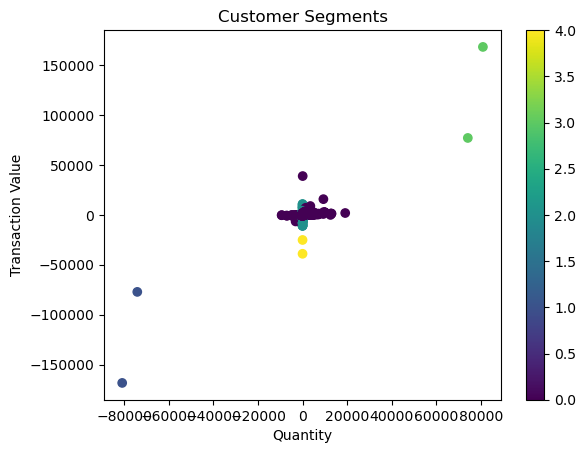

In [8]:

# Visualize clusters
plt.scatter(df['Quantity'], df['Transaction Value'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Quantity')
plt.ylabel('Transaction Value')
plt.title('Customer Segments')
plt.colorbar()
plt.show()